In [237]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [238]:
df = pd.read_csv("C:/Users/vipul/OneDrive/Desktop/Emp_reimb.csv")

In [239]:
pd.set_option('display.max_columns', None)
df.head(7)


,Year,Type_of_yr,Emp_ID,Income,Other_Income,Overtime,Total_Income,Health_Insurance,Retirement,Other_Benefits,Total_Benefits,Total_Reimbursement
0,2015,Financial,42865,92288.22,267.45,270.45,92826.12,12500.56,20703.20,7605.75,40809.51,133635.63
1,2015,Calendar,28253,1466.38,0.00,350.23,1816.61,442.03,3.00,141.59,586.62,2403.23
2,2018,Financial,30664,76536.95,10855.94,13586.72,100979.61,12464.61,18636.19,8011.41,39112.21,140091.82
3,2018,Financial,19482,45659.88,1625.37,3.00,47288.25,0.00,10084.20,3936.63,14020.83,61309.08
4,2017,Financial,7183,41832.00,0.00,6.00,41838.00,5908.52,7621.60,3254.50,16784.62,58622.62
5,2017,Calendar,50436,74132.00,1443.42,4.00,75579.42,12888.34,14855.23,6233.85,33977.42,109556.84
6,2018,Financial,35659,101535.10,0.00,8.00,101543.10,12512.55,21650.32,7915.08,42077.95,143621.05


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49794 entries, 0 to 49793
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 49794 non-null  int64  
 1   Type_of_yr           49794 non-null  object 
 2   Emp_ID               49794 non-null  int64  
 3   Income               49794 non-null  float64
 4   Other_Income         49794 non-null  float64
 5   Overtime             49794 non-null  float64
 6   Total_Income         49794 non-null  float64
 7   Health_Insurance     49794 non-null  float64
 8   Retirement           49794 non-null  float64
 9   Other_Benefits       49794 non-null  float64
 10  Total_Benefits       49794 non-null  float64
 11  Total_Reimbursement  49794 non-null  float64
dtypes: float64(9), int64(2), object(1)
memory usage: 4.6+ MB


In [241]:
df.shape

(49794, 12)

In [242]:
df['Year'] = df['Year'].astype(object)
df = df.drop(['Emp_ID'], axis =1)

In [243]:
print(df.shape)


(49794, 11)


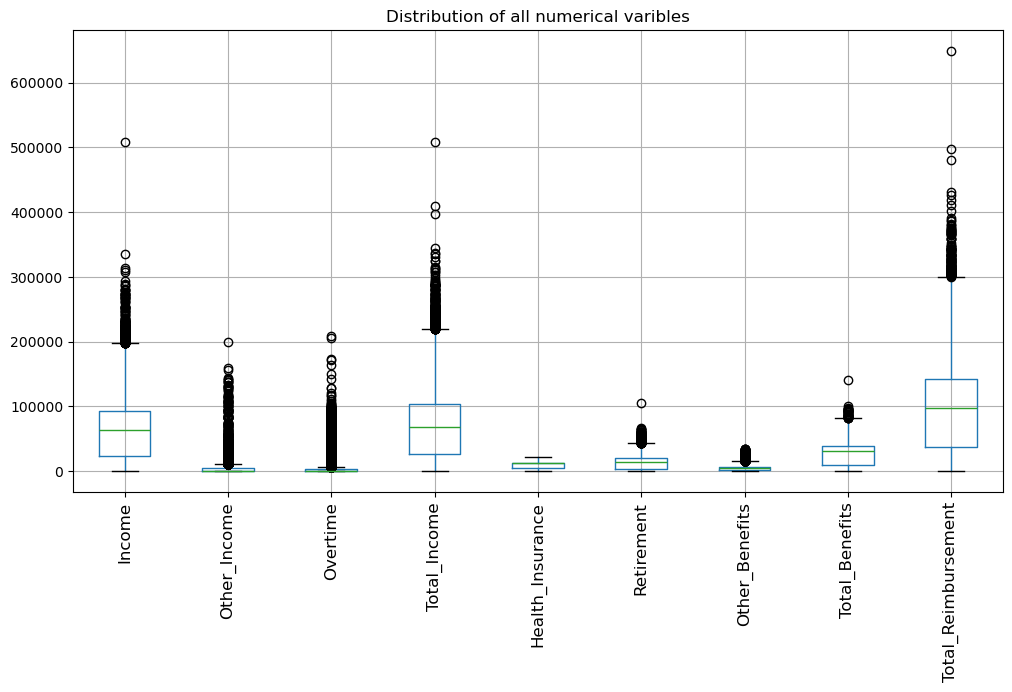

In [244]:
plt.figure(figsize=(12,6))
df.boxplot()
plt.title("Distribution of all numerical varibles", fontsize=12)
plt.xticks(rotation='vertical', fontsize=12)
plt.show()

### Let's remove the all outliers using quantile method

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49794 entries, 0 to 49793
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 49794 non-null  object 
 1   Type_of_yr           49794 non-null  object 
 2   Income               49794 non-null  float64
 3   Other_Income         49794 non-null  float64
 4   Overtime             49794 non-null  float64
 5   Total_Income         49794 non-null  float64
 6   Health_Insurance     49794 non-null  float64
 7   Retirement           49794 non-null  float64
 8   Other_Benefits       49794 non-null  float64
 9   Total_Benefits       49794 non-null  float64
 10  Total_Reimbursement  49794 non-null  float64
dtypes: float64(9), object(2)
memory usage: 4.2+ MB


In [246]:
df_mod = df.drop(['Year', 'Type_of_yr'], axis =1)
# df_mod = df.select_dtypes('number')
Q1 = df_mod.quantile(0.25)
Q3 = df_mod.quantile(0.75)
IQR = Q3 - Q1

df_mod = df_mod[ ~((df_mod < (Q1 - 1.5 * IQR))  | (df_mod > (Q3 + 1.5*IQR))).any(axis=1) ]
df_mod.shape

(37601, 9)

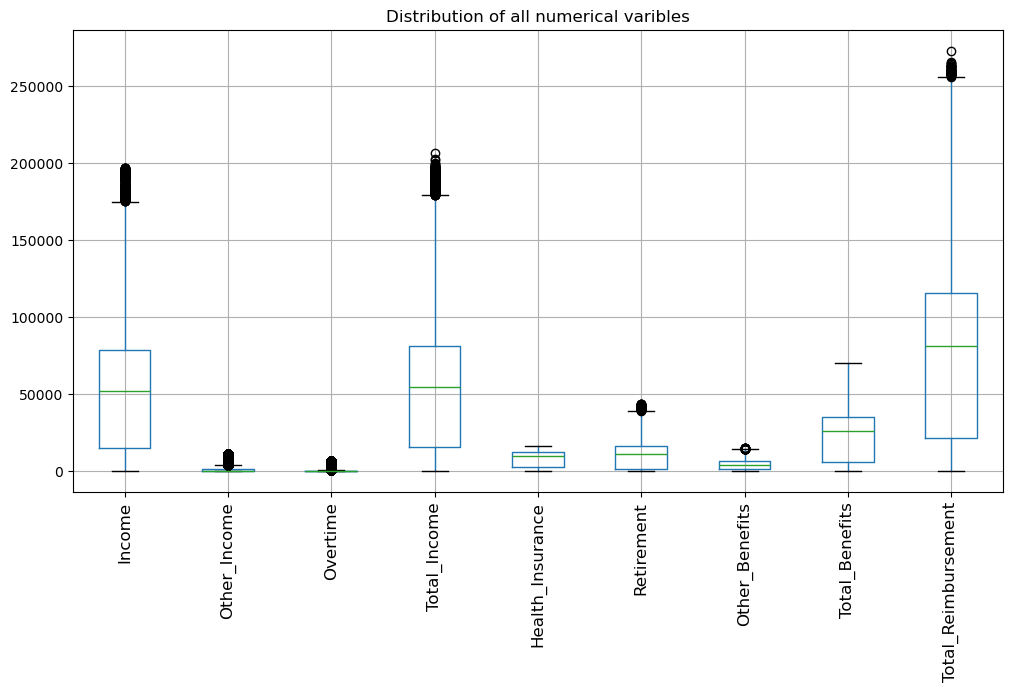

In [247]:
plt.figure(figsize=(12,6))
df_mod.boxplot()
plt.title("Distribution of all numerical varibles", fontsize=12)
plt.xticks(rotation='vertical', fontsize=12)
plt.show()

In [248]:
print(df.shape)
print(df_mod.shape)

(49794, 11)
(37601, 9)


In [249]:
df.isnull().sum()

Year                   0
Type_of_yr             0
Income                 0
Other_Income           0
Overtime               0
Total_Income           0
Health_Insurance       0
Retirement             0
Other_Benefits         0
Total_Benefits         0
Total_Reimbursement    0
dtype: int64

In [250]:
df.head()

,Year,Type_of_yr,Income,Other_Income,Overtime,Total_Income,Health_Insurance,Retirement,Other_Benefits,Total_Benefits,Total_Reimbursement
0,2015,Financial,92288.22,267.45,270.45,92826.12,12500.56,20703.20,7605.75,40809.51,133635.63
1,2015,Calendar,1466.38,0.00,350.23,1816.61,442.03,3.00,141.59,586.62,2403.23
2,2018,Financial,76536.95,10855.94,13586.72,100979.61,12464.61,18636.19,8011.41,39112.21,140091.82
3,2018,Financial,45659.88,1625.37,3.00,47288.25,0.00,10084.20,3936.63,14020.83,61309.08
4,2017,Financial,41832.00,0.00,6.00,41838.00,5908.52,7621.60,3254.50,16784.62,58622.62


### Let's Apply Standardization on the data (z score) 

In [251]:
df.iloc[ : , 2:] = df.iloc[:,2:].apply(lambda value:(value - value.mean())/value.std())
df.head()

,Year,Type_of_yr,Income,Other_Income,Overtime,Total_Income,Health_Insurance,Retirement,Other_Benefits,Total_Benefits,Total_Reimbursement
0,2015,Financial,0.645223,-0.461845,-0.370484,0.407938,0.729518,0.788562,0.775644,0.847083,0.524261
1,2015,Calendar,-1.384158,-0.497569,-0.363296,-1.334593,-1.736245,-1.322995,-1.195970,-1.546535,-1.411561
2,2018,Financial,0.293267,0.952473,0.829177,0.564051,0.722167,0.577713,0.882797,0.746079,0.619497
3,2018,Financial,-0.396670,-0.280466,-0.394578,-0.463962,-1.826632,-0.294646,-0.193532,-0.747081,-0.542635
4,2017,Financial,-0.482203,-0.497569,-0.394308,-0.568316,-0.618441,-0.545848,-0.373713,-0.582611,-0.582263


In [252]:
# let's perform OLS model on different feature varibles
X_train_slr, X_test_slr, y_train_slr, y_test_slr = train_test_split(df['Total_Benefits'], df['Total_Reimbursement'],
                                                                     test_size=0.3, random_state=42)

print(type(X_train_slr))
print(X_train_slr.shape)
print(y_train_slr.shape)
print(X_test_slr.shape)
print(y_test_slr.shape)

<class 'pandas.core.series.Series'>
(34855,)
(34855,)
(14939,)
(14939,)


The generated varibles are a pandas series by default now convert them into dataframe

In [253]:
X_train_slr = pd.DataFrame(X_train_slr)
y_train_slr= pd.DataFrame(y_train_slr)
c = np.ones(X_train_slr.shape[0])

# add the intercept
X_train_slr.insert(loc=0, column='intercept', value=c)
X_train_slr.head()

,intercept,Total_Benefits
13196,1.0,-0.333802
42489,1.0,-1.331208
48515,1.0,0.578256
2054,1.0,0.448485
1057,1.0,0.060733


In [254]:
import statsmodels.api as sm
model_slr = sm.OLS(y_train_slr, X_train_slr).fit()

In [255]:
print(model_slr.summary())

                             OLS Regression Results                            
Dep. Variable:     Total_Reimbursement   R-squared:                       0.892
Model:                             OLS   Adj. R-squared:                  0.892
Method:                  Least Squares   F-statistic:                 2.883e+05
Date:                 Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                         17:50:33   Log-Likelihood:                -10598.
No. Observations:                34855   AIC:                         2.120e+04
Df Residuals:                    34853   BIC:                         2.122e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -0.0012      0.0

In [256]:
y_train_slr_pred = model_slr.predict(X_train_slr)
y_train_slr_pred = pd.DataFrame(y_train_slr_pred)
y_train_slr_pred

,0
13196,-0.315673
42489,-1.255384
48515,0.543626
2054,0.421362
1057,0.056040
...,...
11284,0.812510
44732,0.134830
38158,-1.487361
860,-1.456784


#### Let's find the r score and adj r score to check 

In [257]:
# calculate the SSE on train dataset
sse = np.sum((y_train_slr.values - y_train_slr_pred.values) ** 2)
sse 

3748.7898008274383

In [258]:
# calculate the SST on train dataset
sst = np.sum((y_train_slr.values- y_train_slr.values.mean()) ** 2)
sst 

34758.15318813483

In [259]:
sse + sst 

38506.94298896226

In [260]:
r_sq = model_slr.rsquared

# print the R-squared value
r_sq

0.8921464618520889

In [261]:
r_squared = 1 - (sse / sst)

r_squared

0.8921464618520889

#### It's true , model calculated and our calculated r2 values are same.

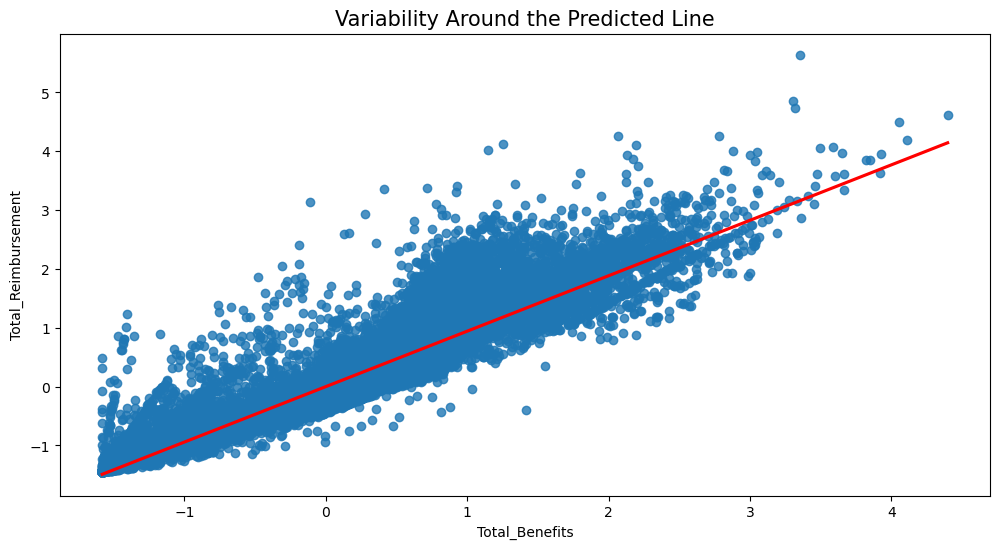

In [263]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.regplot(x = X_train_slr['Total_Benefits'], y = y_train_slr, line_kws={'color' : 'red'})
plt.title('Variability Around the Predicted Line', fontsize = 15)
plt.show()